In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
per100 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2019_per_poss.html')

In [5]:
per100 = pd.DataFrame(per100[0])

In [6]:
for num, row in per100.iterrows():
    if row['Rk'] == 'Rk':
        per100.drop(num, axis=0, inplace=True)

In [7]:
cols = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','ORtg', 'DRtg']

In [8]:
for i in cols:
    per100[i] = per100[i].astype(float).fillna(0)

In [9]:
per100.describe()

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TRB,AST,STL,BLK,TOV,PF,PTS,Unnamed: 29,ORtg,DRtg
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,...,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,0.0,708.000000,708.000000
mean,26.142655,42.882768,19.847458,972.257062,7.241102,16.567232,0.433595,2.024011,6.184605,0.294131,...,9.021045,4.268362,1.484040,0.903107,2.473870,4.497599,19.470198,NaN,106.159605,111.045198
std,4.141178,26.282043,25.858704,802.770673,3.204676,5.395642,0.116644,1.468458,4.197390,0.156088,...,5.162167,2.756643,0.995271,0.941194,1.352344,2.082216,7.648091,NaN,22.033566,4.526607
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,90.000000
25%,23.000000,19.000000,0.000000,245.250000,5.600000,13.500000,0.399000,1.000000,3.800000,0.256000,...,5.575000,2.400000,1.000000,0.300000,1.700000,3.300000,15.400000,NaN,100.000000,108.000000
50%,26.000000,44.000000,6.000000,788.000000,6.900000,16.000000,0.433000,2.100000,6.300000,0.333000,...,7.800000,3.600000,1.400000,0.700000,2.300000,4.200000,18.850000,NaN,108.000000,111.000000
75%,29.000000,68.000000,32.000000,1579.500000,8.900000,19.300000,0.484250,2.900000,8.500000,0.369000,...,11.700000,5.700000,1.825000,1.200000,3.100000,5.500000,23.500000,NaN,115.000000,114.000000
max,42.000000,82.000000,82.000000,3028.000000,49.100000,49.100000,1.000000,11.600000,46.700000,1.000000,...,46.700000,16.300000,12.300000,8.200000,12.300000,22.500000,98.100000,NaN,300.000000,125.000000


In [10]:
per100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708 entries, 0 to 733
Data columns (total 32 columns):
Rk             708 non-null object
Player         708 non-null object
Pos            708 non-null object
Age            708 non-null float64
Tm             708 non-null object
G              708 non-null float64
GS             708 non-null float64
MP             708 non-null float64
FG             708 non-null float64
FGA            708 non-null float64
FG%            708 non-null float64
3P             708 non-null float64
3PA            708 non-null float64
3P%            708 non-null float64
2P             708 non-null float64
2PA            708 non-null float64
2P%            708 non-null float64
FT             708 non-null float64
FTA            708 non-null float64
FT%            708 non-null float64
ORB            708 non-null float64
DRB            708 non-null float64
TRB            708 non-null float64
AST            708 non-null float64
STL            708 non-null float64

In [11]:
per100.drop('Unnamed: 29', axis=1, inplace=True)

In [12]:
per100['NetRtg'] = per100['ORtg'] - per100['DRtg']

In [13]:
#def leader_dict(df, stats):
#    maxmin = {}
#    for i in stats:
#        maxmin[i] = (df[i].idxmax(), df[i].idxmin())
#    return maxmin

In [14]:
#def league_leader(df, stats, file, col='Player'):
#    maxmin = leader_dict(df, stats)
#    with open(file, 'w') as f:
#        f.write('Current league leaders and worst:\n')
#        for key in maxmin.keys():
#            f.write('Highest %s in the league is: %s %.2f\n' 
#                    % (key, df.loc[maxmin[key][0], col],
#                     df.loc[maxmin[key][0], key]))
#            f.write('Lowest %s in the league is %s %.2f\n' 
#                    % (key, df.loc[maxmin[key][1], col],
#                        df.loc[maxmin[key][1], key]))

In [15]:
#file = 'Per100Mar_24.txt'
#league_leader(per100[per100['MP'] >= 1000], cols, file)

In [16]:
#for line in open(file, 'r').readlines():
#    print(line)

In [17]:
#import Stats

In [18]:
#stat_df = Stats.Stats(per100)

In [19]:
#maxmin = stat_df.leader_dict(cols)

In [20]:
from Stats2 import Stats

stat_df = Stats(per100)
type(stat_df)

Stats2.Stats

In [21]:
stat_df['3p_per'] = stat_df['3PA'] / stat_df['FGA']
stat_df['2p_per'] = stat_df['2PA'] / stat_df['FGA']

per100['3p_per'] = per100['3PA'] / per100['FGA']
per100['2p_per'] = per100['2PA'] / per100['FGA']

In [22]:
stat_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'ORtg', 'DRtg',
       'NetRtg', '3p_per', '2p_per'],
      dtype='object')

Text(0.5,0,'3PA per 100pos')

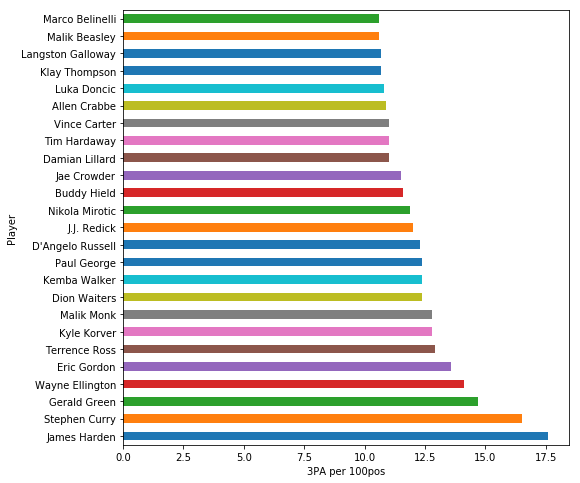

In [23]:
plt.figure(figsize=(8,8))
per100[per100['MP'] >= 1000].groupby('Player')['3PA'].mean().nlargest(25).plot(kind='barh')
plt.ylabel('Player')
plt.xlabel('3PA per 100pos')

Text(0.5,0,'3PA per 100pos')

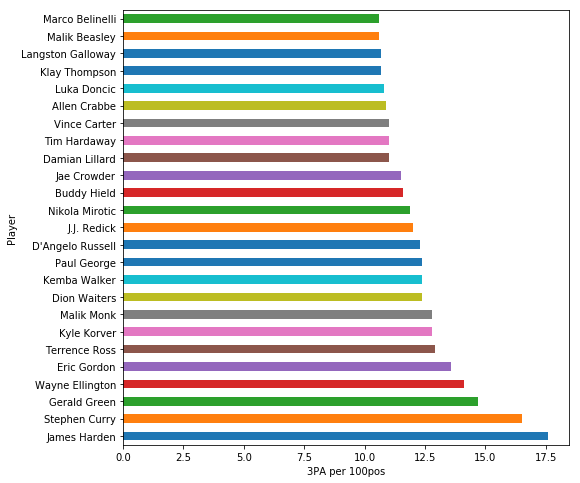

In [24]:
plt.figure(figsize=(8,8))
stat_df[stat_df['MP'] >= 1000].groupby('Player')['3PA'].mean().nlargest(25).plot(kind='barh')
plt.ylabel('Player')
plt.xlabel('3PA per 100pos')

In [25]:
stat_df = stat_df.min_restrict(1000)

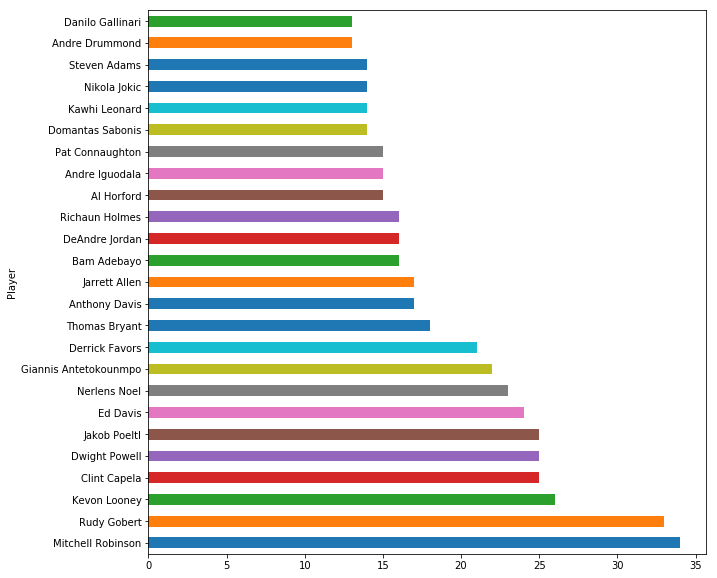

In [26]:
plt.figure(figsize=(10,10))
stat_df.groupby('Player')['NetRtg'].mean().nlargest(25).plot(kind='barh')

In [27]:
#stat_df.groupby('Player')[['AST', 'STL', 'ORtg', 'DRtg', 'NetRtg']].mean().unstack()

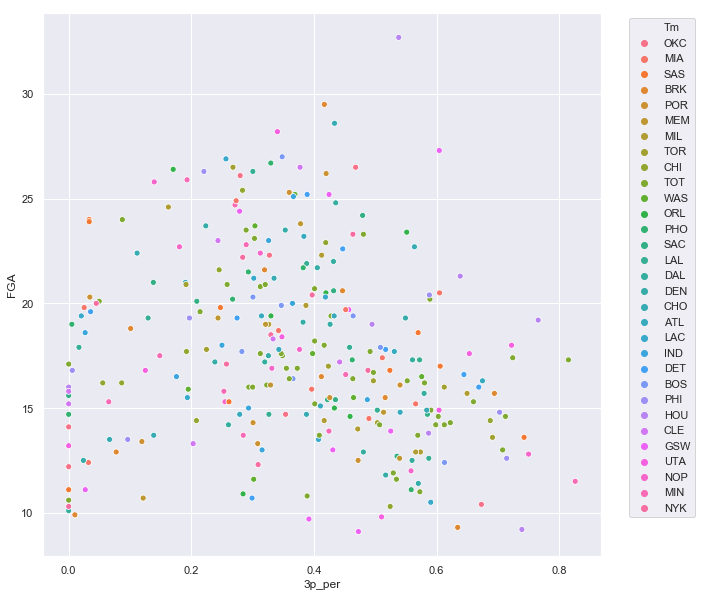

In [28]:
sns.set(rc={'figure.figsize':(10,10)})

sns.scatterplot('3p_per', 'FGA', hue='Tm', data=stat_df)
plt.legend(bbox_to_anchor=(1.04,1), scatterpoints=1)

In [29]:
rks = [i for i in stat_df['Rk']]
dups = [i for i in stat_df['Rk'] if i not in rks]
#for i in stat_df['Rk']:
#    if i not in rks:
#        rks.append(i)
#    else:
#        dups.append(i)

In [30]:
def remove_dup_players(df):
    rks = []
    dups = []
    for i in df['Rk']:
        if i not in rks:
            rks.append(i)
        else:
            dups.append(i)
    for i in dups:
        for num, row in df.iterrows():
            if row['Rk'] == i:
                if not row['Tm'] == 'TOT':
                    df.drop(num, axis=0, inplace=True)

In [31]:
print(len(rks))
print(len(dups))
print(len(stat_df['Rk']))
print(dups)

304
0
304
[]


In [32]:
stat_df[stat_df['Rk'] == '84']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,ORtg,DRtg,NetRtg,3p_per,2p_per
106,84,Jimmy Butler,SF-SG,29.0,TOT,65.0,65.0,2185.0,9.1,19.6,...,2.7,0.8,2.1,2.4,26.3,121.0,110.0,11.0,0.214286,0.785714
108,84,Jimmy Butler,SF,29.0,PHI,55.0,55.0,1824.0,8.9,19.3,...,2.6,0.8,2.1,2.4,25.9,120.0,109.0,11.0,0.196891,0.803109


In [33]:
for i in dups:
    for num, row in stat_df.iterrows():
        if row['Rk'] == i:
            if not row['Tm'] == 'TOT':
                stat_df.drop(num, axis=0, inplace=True)

In [34]:
len(stat_df)

304

In [35]:
stat_df[stat_df['Rk'] == '84']

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,STL,BLK,TOV,PF,PTS,ORtg,DRtg,NetRtg,3p_per,2p_per
106,84,Jimmy Butler,SF-SG,29.0,TOT,65.0,65.0,2185.0,9.1,19.6,...,2.7,0.8,2.1,2.4,26.3,121.0,110.0,11.0,0.214286,0.785714
108,84,Jimmy Butler,SF,29.0,PHI,55.0,55.0,1824.0,8.9,19.3,...,2.6,0.8,2.1,2.4,25.9,120.0,109.0,11.0,0.196891,0.803109


In [36]:
stat_melt = stat_df.melt(id_vars=['Rk', 'Player', 'Pos', 'Age', 'Tm'])
stat_melt.head()

,Rk,Player,Pos,Age,Tm,variable,value
0,4,Steven Adams,C,25.0,OKC,G,80.0
1,5,Bam Adebayo,C,21.0,MIA,G,82.0
2,8,LaMarcus Aldridge,C,33.0,SAS,G,81.0
3,11,Jarrett Allen,C,20.0,BRK,G,80.0
4,13,Al-Farouq Aminu,PF,28.0,POR,G,81.0


In [37]:
stat_melt.shape

(8816, 7)

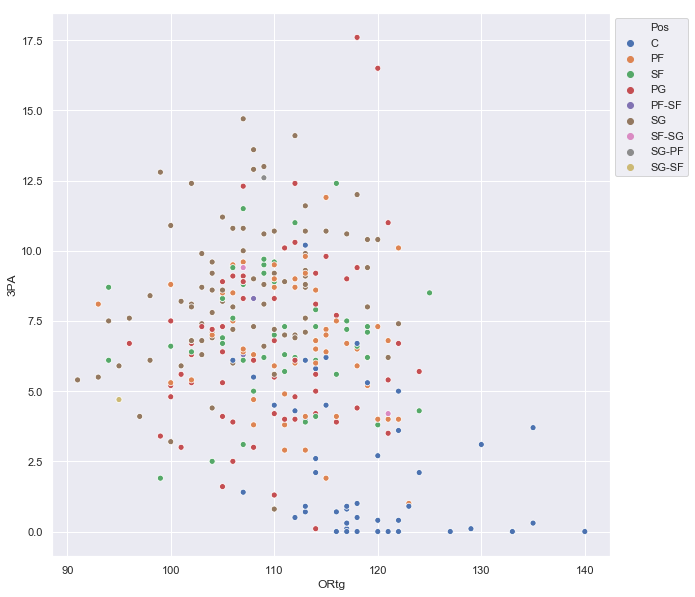

In [39]:
#%%timeit
sns.scatterplot(x='ORtg', y='3PA', data=stat_df, hue='Pos')

# Put last name next to each point
#for line in stat_df.index:
#    plt.text(stat_df.loc[line, 'ORtg'], stat_df.loc[line, '3PA'], stat_df.loc[line, 'Player'].split()[1])
    
plt.legend(bbox_to_anchor=(1.15,1), scatterpoints=1)

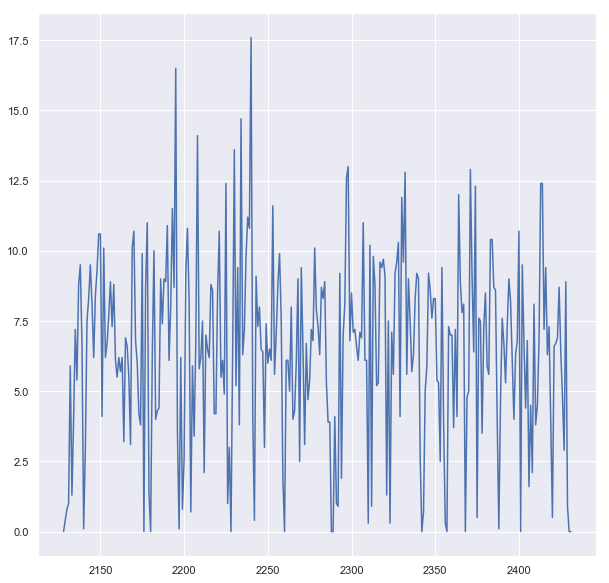

In [40]:
stat_melt[stat_melt['variable'].isin(['3PA'])]['value'].plot()

In [38]:
if 0 in stat_df.values:
    print('Yes!!!')

Yes!!!


NameError: name 'np' is not defined